In [1]:
# 1_data_cleaning.ipynb

import pandas as pd


# Load the dataset
df = pd.read_csv('../data/creditcard.csv')


# Preview
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

# Data Types
print("\nData Types:\n", df.dtypes)

# Save cleaned data if needed (yaha koi missing value nahi hoti is dataset me)
df.to_csv('../output/cleaned_creditcard.csv', index=False)



Shape: (284807, 31)
Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V1

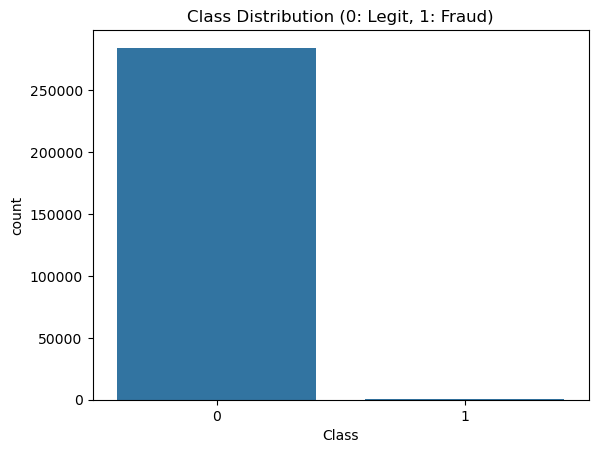

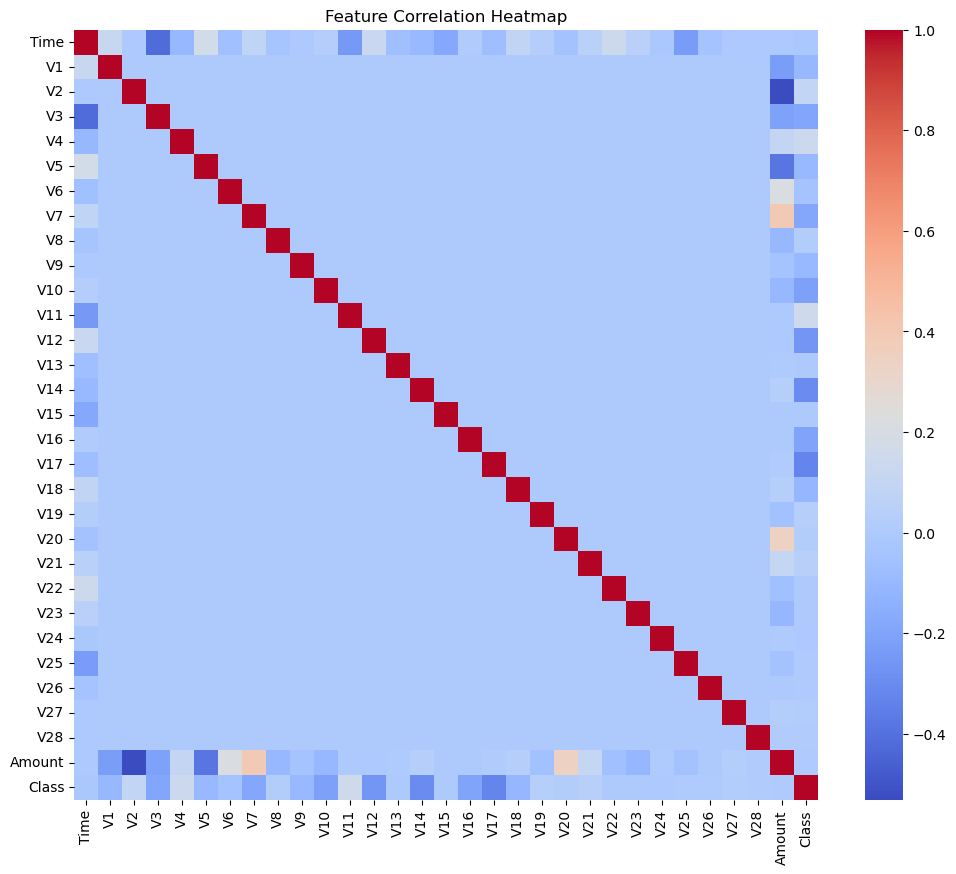

In [ ]:
# 2_eda.ipynb


# Load cleaned data
df = pd.read_csv("../output/cleaned_creditcard.csv")

# Class distribution
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:


# Load data
df = pd.read_csv("../output/cleaned_creditcard.csv")

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save processed data (optional)
os.makedirs("../output", exist_ok=True)
pd.DataFrame(X_train_scaled).to_csv("../output/X_train.csv", index=False)
pd.DataFrame(X_test_scaled).to_csv("../output/X_test.csv", index=False)
y_train.to_csv("../output/y_train.csv", index=False)
y_test.to_csv("../output/y_test.csv", index=False)
# Final check of engineered DataFrame
print(df.head())

# Save the engineered dataset for modeling
df.to_csv('../output/engineered_creditcard.csv', index=False)

print("✅ Engineered file saved to ../output/engineered_creditcard.csv")


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
import os
print(os.getcwd())
print(os.listdir('../output'))


c:\Users\shrad\OneDrive\Documents\Advanced_Financial_Fraud_Detection\notebooks
['cleaned_creditcard.csv', 'X_train.csv', 'y_test.csv']


In [ ]:
# 1. Import libraries


# 2. Load engineered data
df = pd.read_csv('../output/engineered_creditcard.csv')

# 3. Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Define and train model (optimized for speed + class imbalance)
model = RandomForestClassifier(
    n_estimators=50,         # faster training (you can increase later)
    class_weight='balanced', # handles class imbalance
    n_jobs=-1,               # uses all CPU cores
    random_state=42
)

# 6. Fit model
model.fit(X_train, y_train)

# 7. Create models folder if not exists
os.makedirs('../models', exist_ok=True)

# 8. Save the trained model
joblib.dump(model, '../models/fraud_detection_model.pkl')
print(" Model saved to ../models/fraud_detection_model.pkl")

# 9. Predict on test set
y_pred = model.predict(X_test)

# 10. Evaluate model
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


 Model saved to ../models/fraud_detection_model.pkl

 Confusion Matrix:
[[56861     3]
 [   26    72]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56864
           1     0.9600    0.7347    0.8324        98

    accuracy                         0.9995     56962
   macro avg     0.9798    0.8673    0.9161     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [ ]:


# 2. Load engineered data
df = pd.read_csv('../output/engineered_creditcard.csv')

# 3. Load trained model
model = joblib.load('../models/fraud_detection_model.pkl')

# 4. Prepare input features (make sure no extra columns)
X = df.drop('Class', axis=1)

# 5. Predict probabilities and classes
df['Fraud_Probability'] = model.predict_proba(X)[:, 1]
df['Predicted_Class'] = model.predict(X)

# 6. Export final dataset for Power BI
df.to_csv('../output/predicted_creditcard.csv', index=False)
print(" Exported to ../output/predicted_creditcard.csv")


✅ Exported to ../output/predicted_creditcard.csv


features contribute most to model decisions

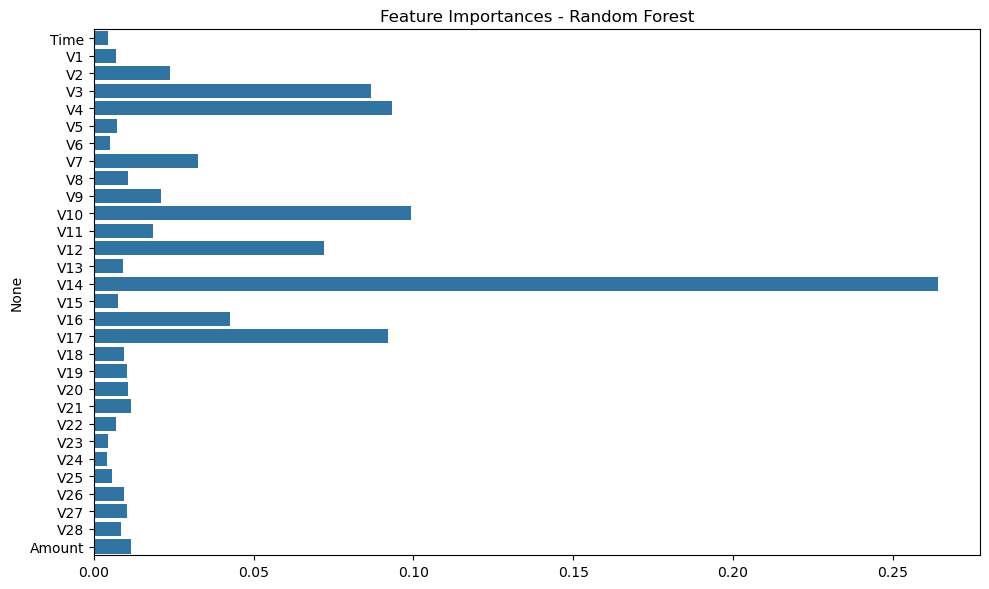

In [ ]:

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


 Model Evaluation Dashboard (Confusion Matrix, ROC Curve, AUC Score)

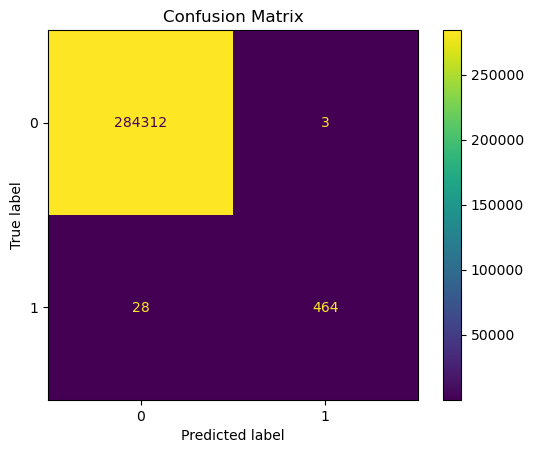

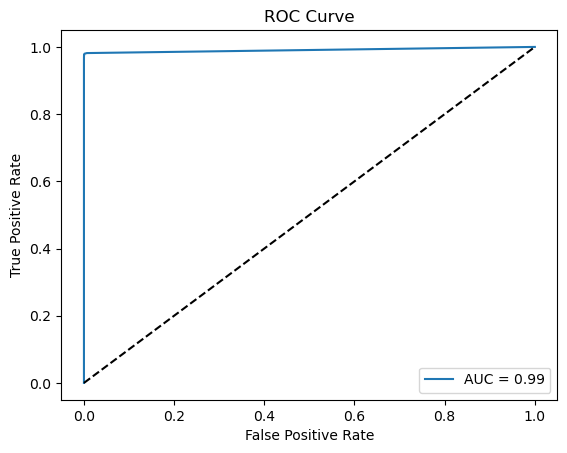

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X, df['Class'])
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(df['Class'], y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


 Model Comparison (RandomForest vs XGBoost vs Logistic Regression)

In [37]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [ ]:


# Load engineered dataset
df = pd.read_csv('../output/engineered_creditcard.csv')

# Features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, clf in models.items():
    print(f"\n🔍 Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n📊 Evaluation for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Save the model
    joblib.dump(clf, f'../models/{name}_model.pkl')
    print(f"✅ {name} model saved to ../models/{name}_model.pkl")



🔍 Training RandomForest...

📊 Evaluation for RandomForest:
[[56859     5]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

✅ RandomForest model saved to ../models/RandomForest_model.pkl

🔍 Training LogisticRegression...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Evaluation for LogisticRegression:
[[56847    17]
 [   30    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.69      0.74        98

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962

✅ LogisticRegression model saved to ../models/LogisticRegression_model.pkl

🔍 Training XGBoost...


C:\Users\shrad\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:39:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Evaluation for XGBoost:
[[56852    12]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

✅ XGBoost model saved to ../models/XGBoost_model.pkl


Time-Based Fraud Analysis 

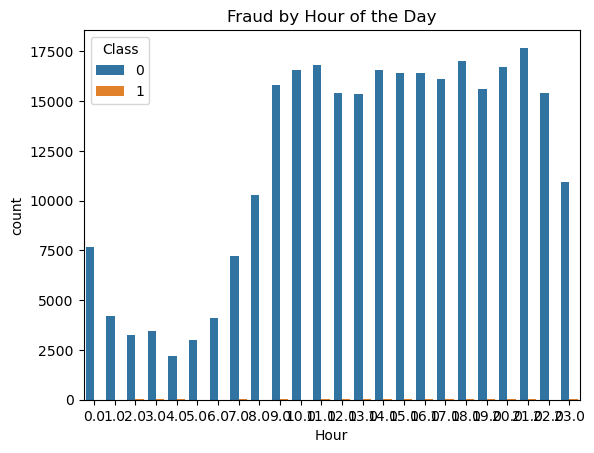

In [41]:
df['Hour'] = (df['Time'] // 3600) % 24
sns.countplot(x='Hour', hue='Class', data=df)
plt.title("Fraud by Hour of the Day")
plt.show()


Save Feature Importance as CSV

In [45]:
import pandas as pd

features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

features.to_csv('../output/feature_importance.csv', index=False)
